# Starbucks Menu Analysis

## Introduction

This dataset presents nutritional information for Starbucks menu items, covering a variety of beverages such as coffee, tea, and smoothies. The dataset includes details like beverage category, name, preparation method, and key nutritional values.

- **Beverage Category:** Classifies the type of drink.
- **Beverage:** Specifies the drink's name.
- **Beverage Preparation:** Details how the drink is made.
- **Calories:** Total energy content.
- **Fat Content (Total, Trans, Saturated):** Breakdown of fat in grams.
- **Sodium:** Sodium content in milligrams.
- **Total Carbohydrates:** Total carbohydrate content, including sugars.
- **Cholesterol:** Cholesterol content in milligrams.

This dataset is a valuable resource for anyone interested in understanding the nutritional aspects of Starbucks beverages. In this analysis, we'll use Python with pandas, numpy, and matplotlib to explore and extract insights from the data.


## Importing Libraries

In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/starbucks/starbucks.csv


## Dataset Overview

Before diving into the analysis, let's load and take a quick look at the dataset. The data includes a variety of Starbucks menu items, providing insights into their nutritional composition. Understanding the structure of the dataset is essential for effective exploration and analysis.


In [2]:
df = pd.read_csv('/kaggle/input/starbucks/starbucks.csv')

## Exploring the Dataset

To gain an initial understanding of our dataset, let's take a closer look at its structure and summary statistics. This exploration will help us identify the key features and get a sense of the data's distribution and characteristics.

In [3]:
# Displaying concise information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [4]:
# Generating descriptive statistics for numerical columns
df.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [5]:
# Displaying the First Few Rows of the Dataset
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [6]:
# Removing leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()

## **Exploratory Data Analysis (EDA)**

### Distribution of Calories

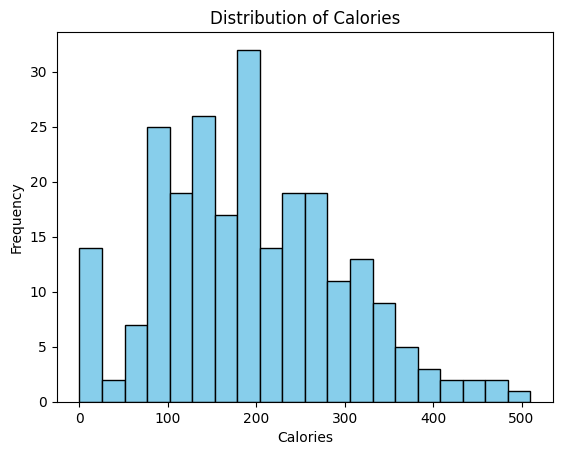

In [7]:
# Visualizing the distribution of calories in Starbucks beverages
plt.hist(df['Calories'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

### Grouping and Statistics by Category

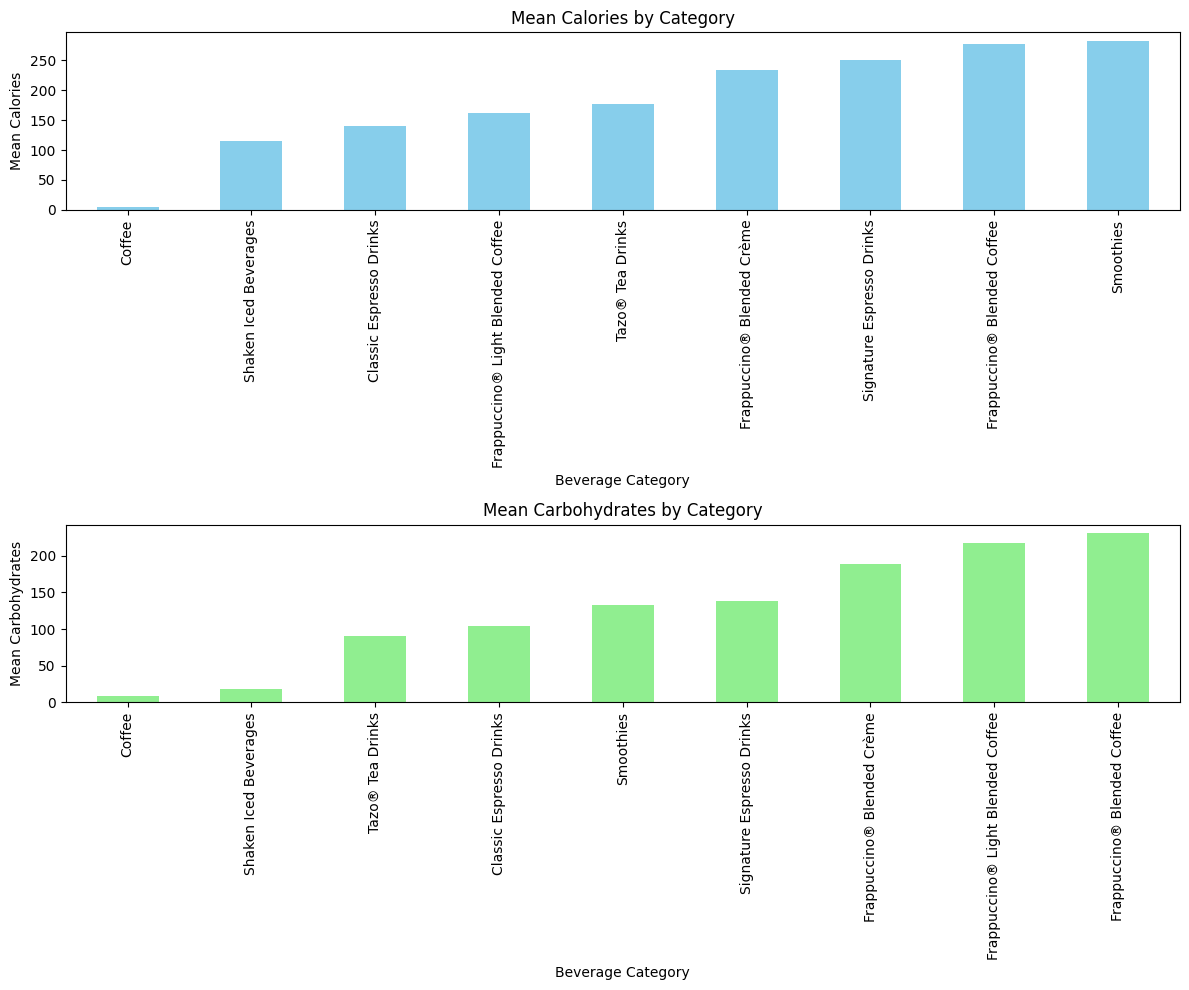

In [8]:
# Calculating mean and standard deviation for calories and carbohydrates by category
category_stats = df.groupby('Beverage_category').agg({'Calories': ['mean', 'std'], 'Total Carbohydrates (g)': ['mean', 'std']})

# Plotting bar charts for mean calories and carbohydrates by category
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

category_stats['Calories']['mean'].sort_values().plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Mean Calories by Category')
axes[0].set_xlabel('Beverage Category')
axes[0].set_ylabel('Mean Calories')

category_stats['Total Carbohydrates (g)']['mean'].sort_values().plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Mean Carbohydrates by Category')
axes[1].set_xlabel('Beverage Category')
axes[1].set_ylabel('Mean Carbohydrates')

plt.tight_layout()
plt.show()

## Analysis of Beverages with Highest Levels of Nutrients

### *Identifying Beverages with Highest Saturated Fat*

In [9]:
# Identifying beverages with the highest levels of saturated fat
highest_saturated_fat = df.nlargest(5, 'Saturated Fat (g)')[['Beverage', 'Saturated Fat (g)']]
print(f"Beverages with Highest Saturated Fat:\n{highest_saturated_fat}")

Beverages with Highest Saturated Fat:
                                     Beverage  Saturated Fat (g)
14                                Caffè Latte                0.3
38   Vanilla Latte (Or Other Flavoured Latte)                0.3
96      Hot Chocolate (Without Whipped Cream)                0.3
128                     Tazo® Green Tea Latte                0.3
8                                 Caffè Latte                0.2


### *Identifying Beverages with Highest Sodium*

In [10]:
# Identifying beverages with the highest levels of sodium
highest_sodium = df.nlargest(5, 'Sodium (mg)')[['Beverage', 'Sodium (mg)']]
print(f"Beverages with Highest Sodium:\n{highest_sodium}")

Beverages with Highest Sodium:
                                          Beverage  Sodium (mg)
128                          Tazo® Green Tea Latte           40
14                                     Caffè Latte           35
38        Vanilla Latte (Or Other Flavoured Latte)           35
72                               Caramel Macchiato           35
84   White Chocolate Mocha (Without Whipped Cream)           35


## Analysis of Caloric Distribution across Beverage Categories

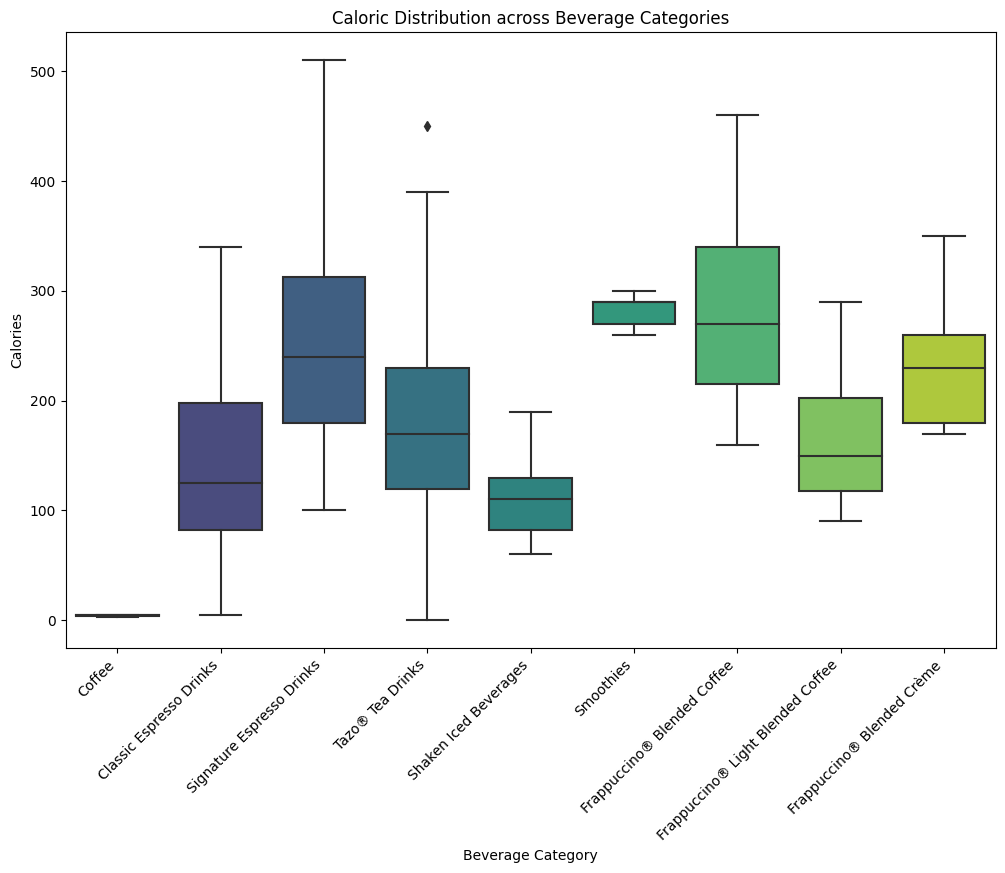

In [11]:
# Set the figure size for better visualization
plt.figure(figsize=(12, 8))

# Create a boxplot to show the distribution of calories across beverage categories
sns.boxplot(x='Beverage_category', y='Calories', data=df, palette='viridis')
plt.title('Caloric Distribution across Beverage Categories')
plt.xlabel('Beverage Category')
plt.ylabel('Calories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

## Additional Insights

In [12]:
# Creating a list of low-calorie drinks (e.g., with less than 50 calories)
low_calorie_drinks = df[df['Calories'] < 50]['Beverage']
print(f"Low-Calorie Drinks: {low_calorie_drinks.tolist()}")

Low-Calorie Drinks: ['Brewed Coffee', 'Brewed Coffee', 'Brewed Coffee', 'Brewed Coffee', 'Caffè Americano', 'Caffè Americano', 'Caffè Americano', 'Caffè Americano', 'Espresso', 'Espresso', 'Tazo® Tea', 'Tazo® Tea', 'Tazo® Tea', 'Tazo® Tea']


### Explanation
#### The list above includes unique low-calorie drinks from the Starbucks dataset. It appears that some drinks are repeated, which may be due to variations in preparation methods (e.g., different sizes or additional ingredients). To enhance clarity, we can display the unique drinks with their respective categories.

In [13]:
# Displaying unique low-calorie drinks with their categories
unique_low_calorie_drinks = df[df['Beverage'].isin(low_calorie_drinks.unique())].drop_duplicates(subset=['Beverage', 'Beverage_category'])
print(unique_low_calorie_drinks[['Beverage', 'Beverage_category']])

            Beverage        Beverage_category
0      Brewed Coffee                   Coffee
40   Caffè Americano  Classic Espresso Drinks
56          Espresso  Classic Espresso Drinks
102        Tazo® Tea         Tazo® Tea Drinks


### Visual Representation
#### To provide a visual representation, let's create a bar chart showcasing the distribution of low-calorie drinks across different categories.

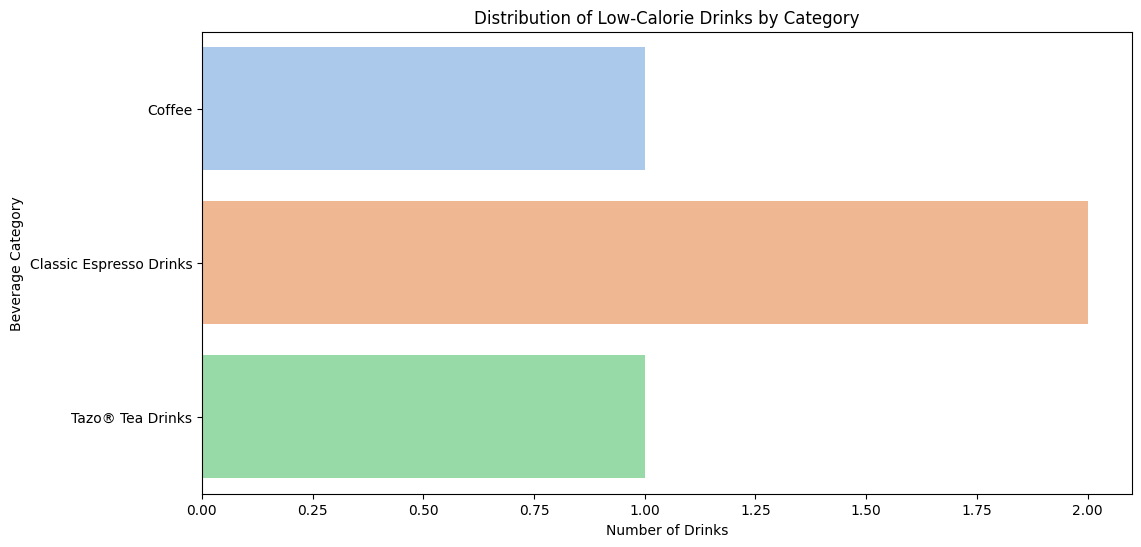

In [14]:
# Creating a bar chart for the distribution of low-calorie drinks by category
plt.figure(figsize=(12, 6))
sns.countplot(y='Beverage_category', data=unique_low_calorie_drinks, palette='pastel')
plt.title('Distribution of Low-Calorie Drinks by Category')
plt.xlabel('Number of Drinks')
plt.ylabel('Beverage Category')
plt.show()

## Analysis of Fat Content in Different Beverage Categories

<Figure size 1200x800 with 0 Axes>

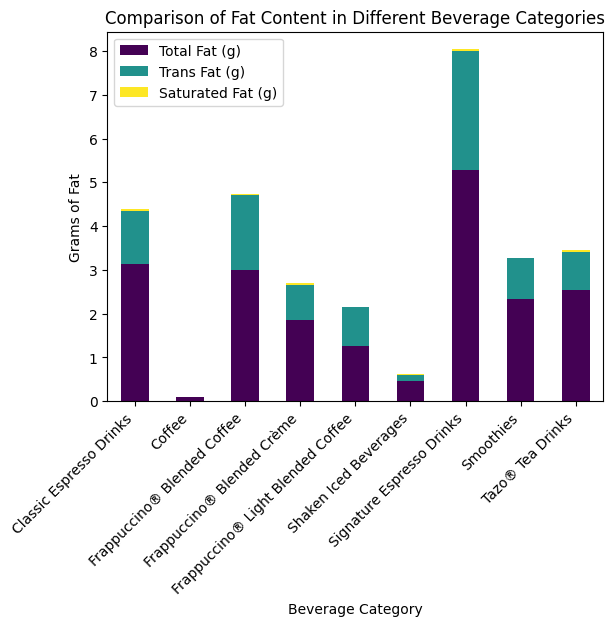

In [15]:
# Select relevant columns for fat content
fat_columns = ['Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)']

# Convert fat columns to numeric (ignoring errors for non-numeric values)
df[fat_columns] = df[fat_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in the selected fat columns
df_fat = df.dropna(subset=fat_columns)

# Set the figure size for better visualization
plt.figure(figsize=(12, 8))

# Create a stacked bar chart to compare fat content in different beverage categories
df_fat[fat_columns + ['Beverage_category']].groupby('Beverage_category').mean().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Comparison of Fat Content in Different Beverage Categories')
plt.xlabel('Beverage Category')
plt.ylabel('Grams of Fat')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

## Final Analysis: Comparison of Nutrient Content across Beverage Categories

<Figure size 1200x800 with 0 Axes>

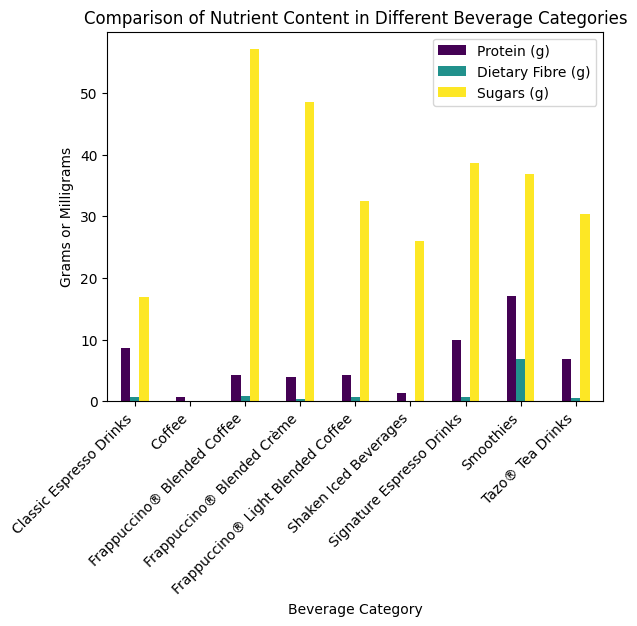

In [16]:
nutrient_columns = ['Protein (g)', 'Dietary Fibre (g)', 'Sugars (g)']

df[nutrient_columns] = df[nutrient_columns].apply(pd.to_numeric, errors='coerce')

df_nutrients = df.dropna(subset=nutrient_columns)

plt.figure(figsize=(12, 8))

df_nutrients[nutrient_columns + ['Beverage_category']].groupby('Beverage_category').mean().plot(kind='bar', colormap='viridis')
plt.title('Comparison of Nutrient Content in Different Beverage Categories')
plt.xlabel('Beverage Category')
plt.ylabel('Grams or Milligrams')
plt.xticks(rotation=45, ha='right')  

plt.show()

## Conclusion: Starbucks Beverage Analysis

In this Jupyter Notebook, we delved into a thorough exploration of the Starbucks Beverage dataset using Pandas, Matplotlib, Seaborn, and Numpy. The dataset provided comprehensive nutritional information on Starbucks menu items, allowing us to gain insights into calories, fat content, sodium levels, carbohydrates, and more.

**Closing Thoughts:**

- This notebook provides a detailed exploration of Starbucks Beverage data, offering valuable insights into nutritional aspects.
- Analyses conducted can be foundational for further investigations based on specific research questions or interests.
- The combination of descriptive statistics and visualizations enhances our understanding of the dataset, catering to researchers, health-conscious consumers, and Starbucks enthusiasts.

*By: Tiago Domingos*